In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
X=df[['enginesize']].values.reshape(-1,1)
y=df['price'].values

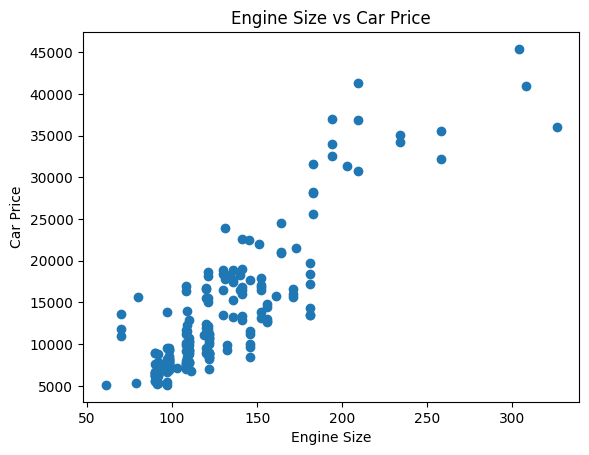

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)


In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear R²:", r2_score(y_test, y_pred_linear))

print("Polynomial MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial R²:", r2_score(y_test, y_pred_poly))



Linear MSE: 15465458.96590847
Linear R²: 0.8040958796678975
Polynomial MSE: 11621389.45532237
Polynomial R²: 0.8527894915178184


In [15]:
import numpy as np

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_range_pred, color="red", label="Polynomial Fit")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Polynomial Regression: Engine Size vs Price")
plt.legend()
plt.show()


NameError: name 'model' is not defined

In [ ]:
engine_size = [[200]]
engine_size_poly = poly.transform(engine_size)

predicted_price = model.predict(engine_size_poly)
print("Predicted price for engine size 200:", predicted_price[0])


Predicted price for engine size 200: 27760.60834538506


In [ ]:
engine_size = [[200]]

linear_price = linear_model.predict(engine_size)

poly_engine = poly.transform(engine_size)
poly_price = poly_model.predict(poly_engine)

print("\nPrediction for Engine Size = 200")
print("Linear Model Price:", linear_price[0])
print("Polynomial Model Price:", poly_price[0])



Prediction for Engine Size = 200
Linear Model Price: 25427.147445039864
Polynomial Model Price: 27760.60834538506


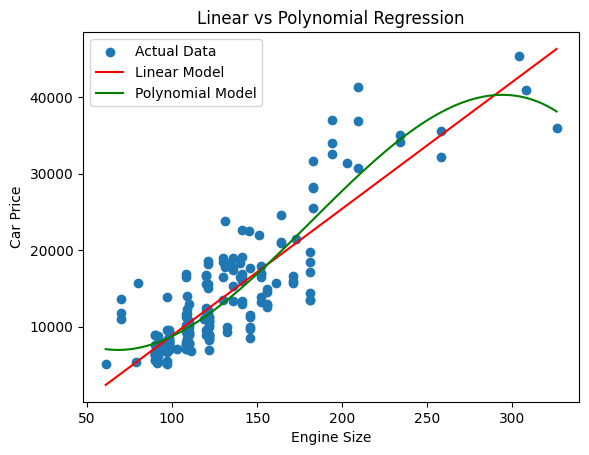

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Linear line
y_linear_curve = linear_model.predict(X_range)

# Polynomial curve
X_range_poly = poly.transform(X_range)
y_poly_curve = poly_model.predict(X_range_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_linear_curve, color="red", label="Linear Model")
plt.plot(X_range, y_poly_curve, color="green", label="Polynomial Model")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()


In [ ]:
linear_model.predict(X_train)
y_train_pred = linear_model.score(X_train,y_train)
print(y_train_pred)

0.7507055061579612


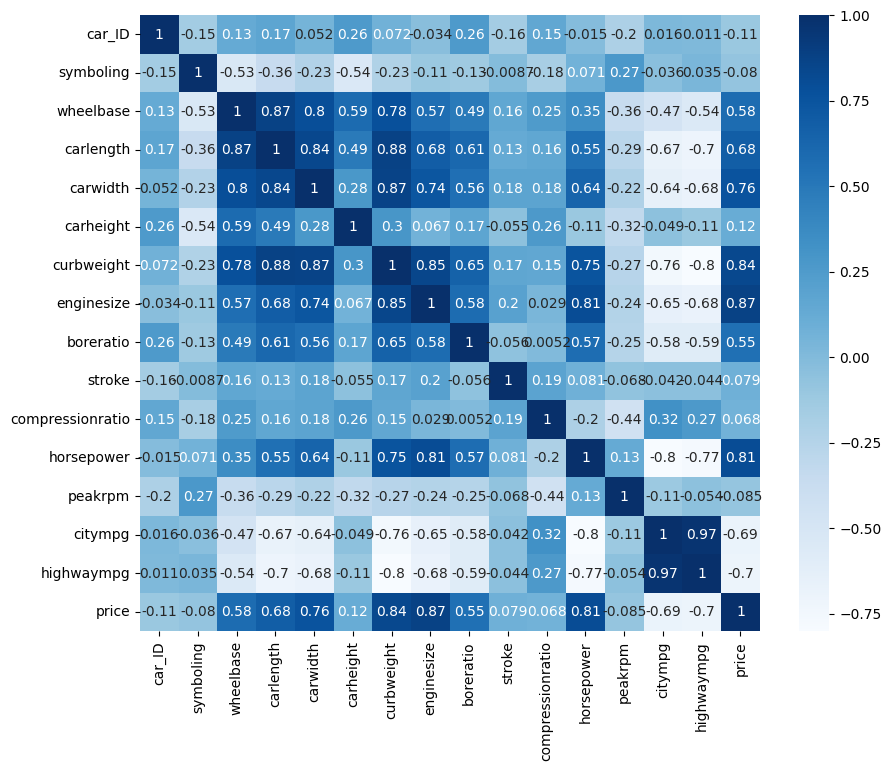

In [ ]:
import seaborn as sns
corr=df.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()


## Insights

### Relationship of Each Numerical Column with Target (Price)

- *enginesize → Strong positive 0.87*  
  Larger engines significantly increase car price.

- *horsepower → Strong positive 0.84*  
  Higher power directly drives premium pricing.

- *curbweight → Strong positive 0.81*  
  Heavier cars usually indicate better build and luxury, increasing price.

- *carwidth → Moderate to strong positive 0.76*  
  Wider cars are often premium models, contributing to higher prices.

- *carlength → Moderate positive 0.68*  
  Longer cars tend to cost more, but length alone is not a dominant factor.

- *wheelbase → Moderate positive 0.58*  
  A longer wheelbase improves comfort and stability, moderately affecting price.

- *boreratio → Moderate positive 0.55*  
  Indicates engine performance efficiency, influencing price moderately.

- *stroke → Weak positive 0.12*  
  Has limited direct impact on pricing compared to other engine metrics.

- *compressionratio → Weak positive 0.079(unrelavant)*  
  Slight influence; not a major pricing determinant.

- *peakrpm → Weak positive 0.068(unrelavant)*  
  Engine RPM capability has minimal effect on overall car price.

- *citympg → Strong negative -0.08*  
  Higher fuel efficiency is associated with economy cars and lower prices.

- *highwaympg → Strong negative -0.085*  
  Similar to city mpg, higher mileage usually means lower-priced vehicles.

- *symboling → Weak negative -0.11*  
  Risk rating has little influence on car price.

- *height → Weak positive -0.7*  
  Vehicle height alone does not strongly affect pricing.

- *numofdoors → Weak positive -0.69*  
  Door count has minimal impact compared to performance features.

*Overall Business Insight:*  
Car price is *strongly driven by performance and engine-related features, moderately influenced by vehicle dimensions, and **negatively related to fuel efficiency*, reflecting real-world automobile market behavior.



* if features having correlation value is lessthan 0.1 can be removed to obtain a optimal model
  They are -- compressionratio,citympg,highwaympg,symboling

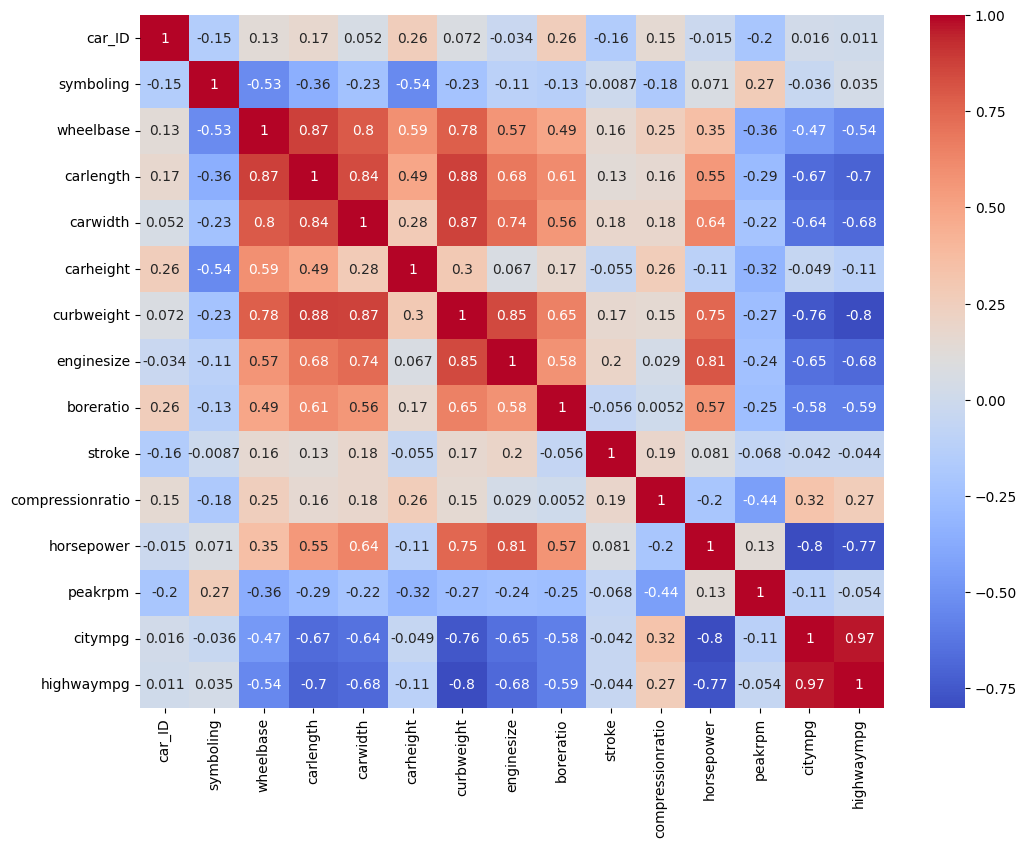

In [ ]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

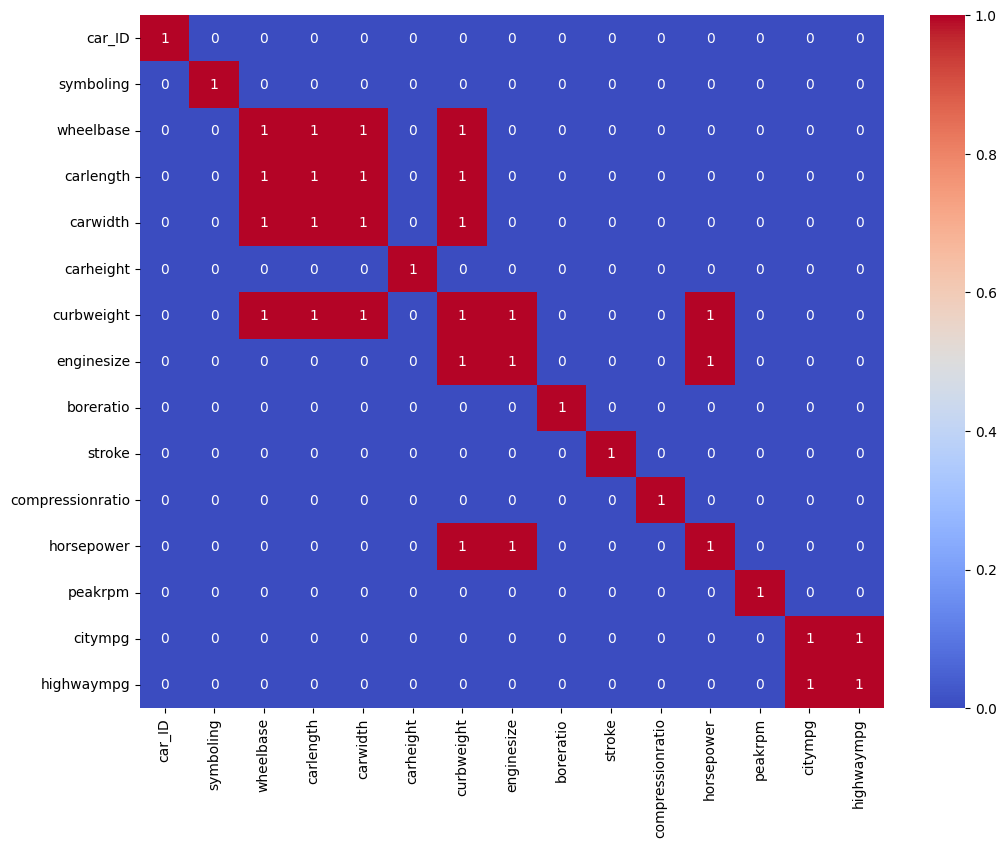

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Correlation matrix (compute only on numeric columns to avoid errors from object/string columns)
num_df = x.select_dtypes(include=[np.number])
non_numeric = x.select_dtypes(exclude=[np.number]).columns.tolist()

corr = num_df.corr()

threshold = 0.75

print(f"Highly correlated feature pairs (|correlation| > {threshold}):\n")
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        corr_value = corr.iloc[i, j]
        if abs(corr_value) > threshold:
            print(f"{corr.columns[i]} - {corr.columns[j]} : {corr_value:.2f}")

Highly correlated feature pairs (|correlation| > 0.75):

wheelbase - carlength : 0.87
wheelbase - carwidth : 0.80
wheelbase - curbweight : 0.78
carlength - carwidth : 0.84
carlength - curbweight : 0.88
carwidth - curbweight : 0.87
curbweight - enginesize : 0.85
curbweight - horsepower : 0.75
curbweight - citympg : -0.76
curbweight - highwaympg : -0.80
enginesize - horsepower : 0.81
horsepower - citympg : -0.80
horsepower - highwaympg : -0.77
citympg - highwaympg : 0.97


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



cols_to_remove = [
    "compressionratio",
    "peakrpm",
    "citympg",
    "highwaympg",
    "wheelbase",
    "carlength"
]
df = df.drop(columns=cols_to_remove, errors="ignore")

numeric_df = df.select_dtypes(include=["int64", "float64"])

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R² Score (Train):", round(r2_train, 3))
print("R² Score (Test):", round(r2_test, 3))

R² Score (Train): 0.843
R² Score (Test): 0.853


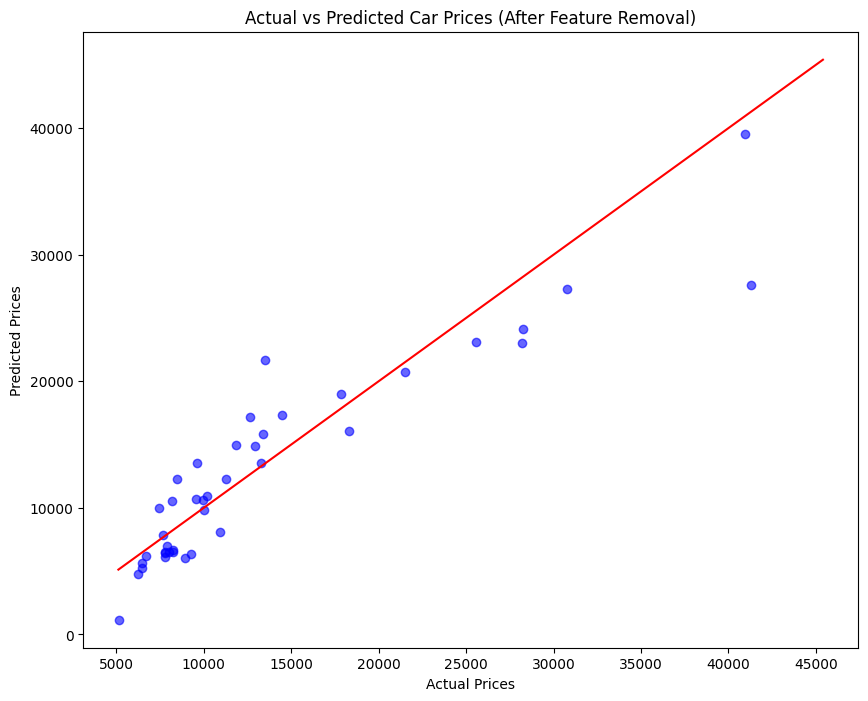

In [ ]:
# linear regression after removing features 
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices (After Feature Removal)")

plt.show()

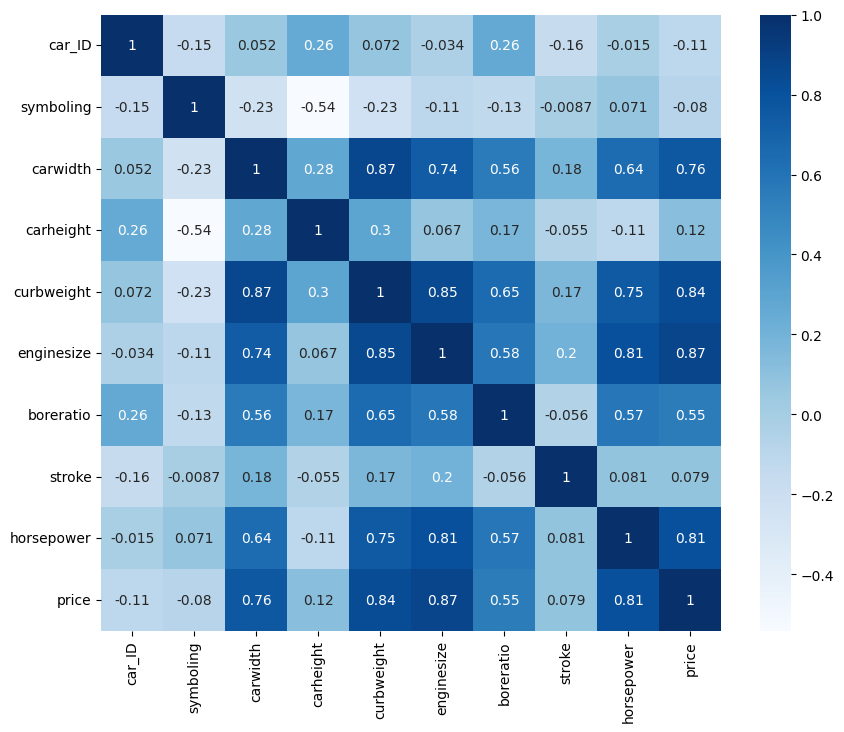

In [ ]:

# visualization of correlation matrix after removing features
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()

### Ridge and Lasso

Ridge Regression R² Score (Train): 0.751
Ridge Regression R² Score (Test): 0.804
Lasso Regression R² Score (Train): 0.751
Lasso Regression R² Score (Test): 0.804


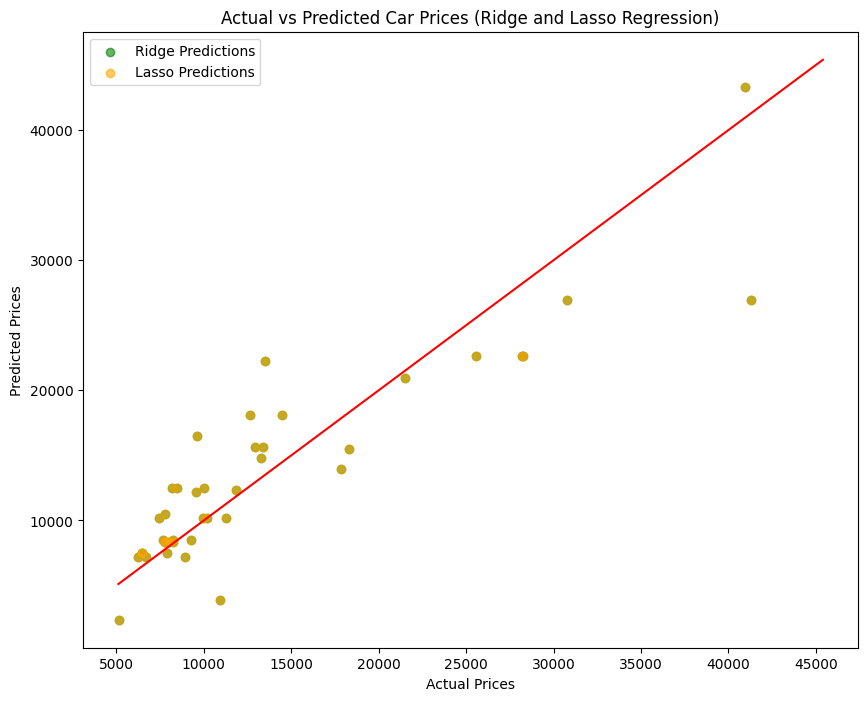

In [17]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_train_ridge_pred = ridge_model.predict(X_train)
y_test_ridge_pred = ridge_model.predict(X_test)
y_train_lasso_pred = lasso_model.predict(X_train)
y_test_lasso_pred = lasso_model.predict(X_test)
r2_train_ridge = r2_score(y_train, y_train_ridge_pred)
r2_test_ridge = r2_score(y_test, y_test_ridge_pred)
r2_train_lasso = r2_score(y_train, y_train_lasso_pred)
r2_test_lasso = r2_score(y_test, y_test_lasso_pred)
print("Ridge Regression R² Score (Train):", round(r2_train_ridge, 3))
print("Ridge Regression R² Score (Test):", round(r2_test_ridge, 3))
print("Lasso Regression R² Score (Train):", round(r2_train_lasso, 3))
print("Lasso Regression R² Score (Test):", round(r2_test_lasso, 3))
y_test_ridge_pred = ridge_model.predict(X_test)
y_test_lasso_pred = lasso_model.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_test_ridge_pred, color='green', alpha=0.6, label='Ridge Predictions')
plt.scatter(y_test, y_test_lasso_pred, color='orange', alpha=0.6, label='Lasso Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices (Ridge and Lasso Regression)")
plt.legend()
plt.show()


In [21]:
from sklearn.linear_model import RidgeCV

import numpy as np

model=RidgeCV(alphas=alphas)

alphas=np.arange(0.1,10,0.05)

model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 9.950000000000003
best score:  0.8040933847317073


In [23]:
from sklearn.linear_model import LassoCV

import numpy as np

model=LassoCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)

model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 

Best alpha: 9.950000000000003
best score:  0.8040934124003777
